# Курсовая работа на тему : **«Предварительный анализ данных и построение признаков в задачах машинного перевода»**

## **1. Введение**



Задача машинного перевода – это процесс автоматического перевода текста с одного языка на другой с помощью компьютерных программ. В последние годы задача машинного перевода стала особенно актуальной в связи с развитием искусственного интеллекта и нейронных сетей. Одним из ключевых этапов в процессе машинного перевода является предварительный анализ данных и построение признаков, которые помогают повысить качество перевода.

### **1.1 Цель работы**

Цель данной работы – исследование методов предварительного анализа данных и построения признаков в задачах машинного перевода и выявить их влияние на качество перевода.





Объектом работы являются различные модели машинного обучения, в частности будут рассмотрены:

1) Модель логистической регрессии;

2) Простая рекуррентная нейронная сеть(RNN).

Для каждой модели будет необходимо провести свой анализ данных.

Предметом анализа являются 2 набора с аналогичными фразами на английском и русском языках.

## **2. Основная часть**

### **2.1 Обзор литературы по предварительному анализу данных в задачах машинного перевода**

Предварительный анализ данных в задачах машинного перевода включает в себя следующие этапы:
- Удаление стоп-слов;

- Токенизация;

- Padding (Паддинг)

Стоп-слова – слова, которые обычно игнорируются в процессе обработки текста, так как они не представляют значимой информации о содержании текста. Эти слова включают в себя часто встречающиеся слова, такие как предлоги, союзы, артикли и т.д., которые не вносят существенного вклада в смысл предложения.

Токенизация – разбиение текста на токены, которыми могут быть как отдльные символы, так и слова илои целые предложения.

Padding (Паддинг) – каждое предложение должно быть одинаковой длины. Поскольку предложения имеют разную длину, нужно добавить отступы в конец, чтобы дополнить их до одинакового размера.

**Метрики эффективности**



*   **accuracy** (точность) – доля правильно классифицированных объектов по отношению ко всем классифицированным объектам. Также это самая простая метрика.  





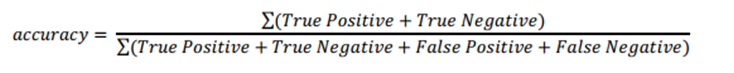




*   **precision** (точность) – доля верно классифицированных положительных классов относительно всех объектов, которые модель отнесла к положительному классу.



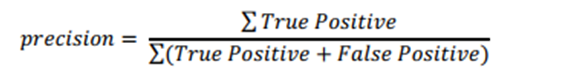



*   **recall** (полнота) – доля верно классифицированных положительных классов относительно всех объектов, которые были классифицированы верно.



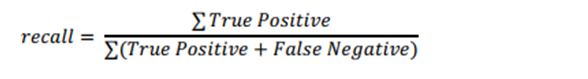



*   **F1-мера** – гармоническая средняя между precision и recall



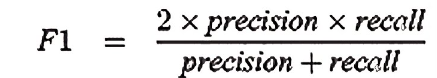

Эти метрики помогают понять производительность модели машинного обучения и ее способность правильно классифицировать объекты.

### **2.2 Описание исследуемых данных**

Датасет «Англо-русский словарь для машинного перевода» взят из открытого источника **kaggle**.

Датасет содержит идентичный слова, словосочетания и предложения на английском и русском языках.

#### **Импорт библиотек**

Для начала импортируем необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Reshape
from tensorflow.keras.models import Sequential, Model

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#### **Загрузка датасета**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('rus.txt', delimiter='\t', header=None).iloc[:, :2]
data.rename(columns={0: 'eng', 1: 'rus'}, inplace=True)

In [ ]:
data.head()

,eng,rus
0,Go.,Марш!
1,Go.,Иди.
2,Go.,Идите.
3,Hi.,Здравствуйте.
4,Hi.,Привет!


In [ ]:
data.tail()

,eng,rus
363381,"In today's world, we have to equip all our kid...",В современном мире перед нами стоит задача дат...
363382,Death is something that we're often discourage...,"Смерть - это зачастую то, разговоры или даже м..."
363383,"At a moment when our economy is growing, our b...","В тот момент, когда наша экономика растёт, наш..."
363384,Since there are usually multiple websites on a...,"Поскольку сайтов, посвящённых какой-либо теме,..."
363385,Doubtless there exists in this world precisely...,"Несомненно, для каждого мужчины в этом мире гд..."


### **2.3 Общие преобразования**

#### **Удаление знаков препинания и лишних пробелов**

Для начала преобразуем заглавные символы в строчные, уберем все знаки препинания и лишние пробелы:

In [ ]:
data['eng'] = data['eng'].apply(lambda x: re.sub("[^'a-z]", ' ', x.lower()))
data['eng'] = data['eng'].apply(lambda x: re.sub('\s+', ' ', x).strip())

data['rus'] = data['rus'].apply(lambda x: re.sub('[^ёа-я]', ' ', x.lower()))
data['rus'] = data['rus'].apply(lambda x: re.sub('\s+', ' ', x).strip())

In [ ]:
data.tail()

,eng,rus
363381,in today's world we have to equip all our kids...,в современном мире перед нами стоит задача дат...
363382,death is something that we're often discourage...,смерть это зачастую то разговоры или даже мысл...
363383,at a moment when our economy is growing our bu...,в тот момент когда наша экономика растёт наши ...
363384,since there are usually multiple websites on a...,поскольку сайтов посвящённых какой либо теме к...
363385,doubtless there exists in this world precisely...,несомненно для каждого мужчины в этом мире где...


Проверим, есть ли пропуски в данных:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363386 entries, 0 to 363385
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   eng     363386 non-null  object
 1   rus     363386 non-null  object
dtypes: object(2)
memory usage: 5.5+ MB


Пропусков нет. Теперь посчитаем количество уникальных слов для каждого языка:

In [ ]:
eng_unique = []
rus_unique = []

for i in data['eng']:
    eng_unique += i.split(' ')

for i in data['rus']:
    rus_unique += i.split(' ')

eng_unique_count = Counter(eng_unique)
rus_unique_count = Counter(rus_unique)

In [ ]:
print(f'Количество уникальных английских слов: {len(eng_unique_count.keys())}')
print(f'Количество уникальных русских слов: {len(rus_unique_count.keys())}')

Количество уникальных английских слов: 16191
Количество уникальных русских слов: 52890


#### **Разбиение предложений на отдельные слова**

In [ ]:
ru_split = []
en_split = []

for word in data['rus'].tolist():
    ru_split.extend(word.split())

for word in data['eng'].tolist():
    en_split.extend(word.split())

### **2.4 Логистической регрессии**

Произведем сравнение нескольких методов:


1.   Преобразование всех данных в вектор признаков без каких-либо других предварительных преобразований;
2.   Предварительное удаление стоп-слова;
3.   Удаление дубликатов, оставляя только уникальные пары.





#### **2.4.1 Способ №1**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(en_split[:10000],
                                                    ru_split[:10000],
                                                    test_size=0.2,
                                                    random_state=42)
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_vect, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test_vect)
print(f'Точность модели: {accuracy_score(y_test, predictions)}')

Точность модели: 0.1445


#### **2.4.2 Способ №2**

##### **Визуализация частот слов**

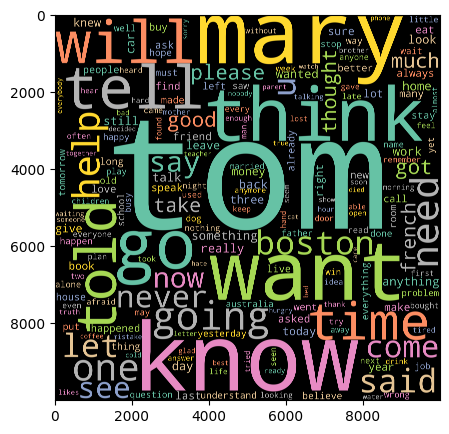

In [ ]:
wordCloud = WordCloud(width = 10000, height = 10000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False).generate(' '.join(en_split))
plt.figure(figsize=(5,5))
plt.imshow(wordCloud)

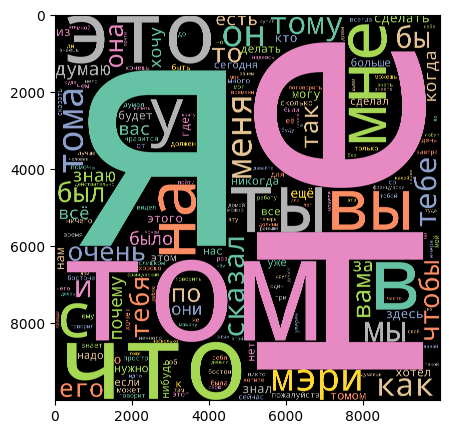

In [ ]:
wordCloud = WordCloud(width = 10000, height = 10000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False).generate(' '.join(ru_split))
plt.figure(figsize=(5,5))
plt.imshow(wordCloud)

Видно, что чаще всего встречаются стоп-слова

##### **Удаление стоп-слов**

Установим необходимые расширения

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
rus_stop_words = set(stopwords.words('russian'))
eng_stop_words = set(stopwords.words('english'))

Посчитаем количество стоп-слов для каждого языка

In [ ]:
COU_e, COU_r = 0, 0
for i in rus_stop_words:
  COU_r += ru_split.count(i)

for i in eng_stop_words:
  COU_e += en_split.count(i)

In [ ]:
print(f'Всего русских слов: {len(ru_split)};')
print(f'Количество русских стоп-слов: {COU_r}')
print(f'Всего английских слов: {len(en_split)};')
print(f'Количество английских стоп-слов: {COU_e}')

Всего русских слов: 1903034;
Количество русских стоп-слов: 851881
Всего английских слов: 2182985;
Количество английских стоп-слов: 1115498


Избавимся от стоп-слов

In [ ]:
en_withount_stop_words = []
ru_withount_stop_words = []

for i in ru_split:
  if i not in rus_stop_words:
    ru_withount_stop_words += [i]

for i in en_split:
  if i not in eng_stop_words:
    en_withount_stop_words += [i]

In [ ]:
print(f'Количество английских слов: {len(en_withount_stop_words)}')
print(f'Количество русских слов: {len(ru_withount_stop_words)}')

Видно, что английских слов больше, поэтому избавимся от "лишних"

In [ ]:
en_withount_stop_words = en_withount_stop_words[:len(ru_withount_stop_words)]
len(en_withount_stop_words), len(ru_withount_stop_words)

(1051153, 1051153)

##### **Визуализация частот слов**

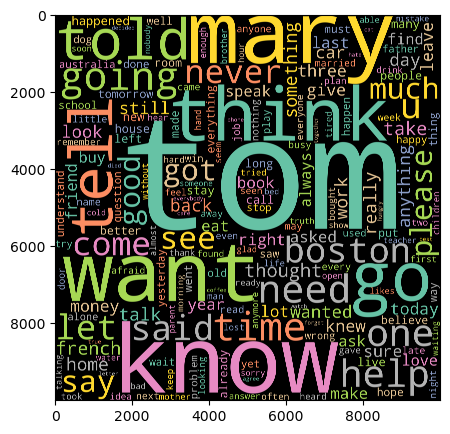

In [ ]:
wordCloud = WordCloud(width = 10000, height = 10000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False)
wordCloud.generate(' '.join(en_withount_stop_words))
plt.figure(figsize=(5,5))
plt.imshow(wordCloud)

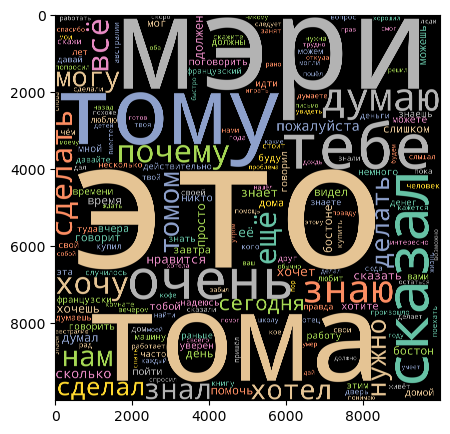

In [ ]:
wordCloud = WordCloud(width = 10000, height = 10000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False)
wordCloud.generate(' '.join(ru_withount_stop_words))
plt.figure(figsize=(5,5))
plt.imshow(wordCloud)

##### **Построение модели**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(en_withount_stop_words[:10000],
                                                    ru_withount_stop_words[:10000],
                                                    test_size=0.2,
                                                    random_state=42)
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_vect, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test_vect)
print(f'Точность модели: {accuracy_score(y_test, predictions)}')

Точность модели: 0.015


Точность модели стала хуже

#### **2.4.3 Способ №3**

##### **Удаление дубликатов**

In [ ]:
sps_en = []
sps_ru = []

for Eng, Rus in zip(en_withount_stop_words, ru_withount_stop_words):
    if Eng not in sps_en:
        sps_en.append(Eng)
        sps_ru.append(Rus)

In [ ]:
print(f'Количество уникальных английских слов: {len(sps_en)}')
print(f'Количество уникальных русских слов: {len(sps_ru)}')

Количество уникальных английских слов: 15619
Количество уникальных русских слов: 15619


Проверка

In [ ]:
sps_ru[:3], sps_en[:3]

(['марш', 'здравствуйте', 'беги'], ['go', 'hi', 'run'])

##### **Построение модели**

In [ ]:
vec_en = TfidfVectorizer().fit_transform(sps_en)

In [ ]:
vec_en.shape, len(sps_ru)

((15619, 15164), 15619)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vec_en,
                                                    sps_ru,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions = model.predict(X_test)
print(f'Точность модели: {accuracy_score(y_test, predictions)}')

Точность модели: 0.03937259923175416


Точность модели с удаленными дубликатами значительно выше, но всё же хуже самой первой модели

Для модели логистической регрессии лучшим оказалось преобразование всех данных в вектор признаков без каких-либо других предварительных преобразований.

### **2.5 Простая нейронная модель**

#### **Токенизация**

Для проверки корректности работы будем проверять функции на 10 строках, состоящих из нескольких слов:

In [ ]:
def tokenization(sentences):
  sentence_tokenizated = Tokenizer()
  sentence_tokenizated.fit_on_texts(sentences)
  return sentence_tokenizated.word_index, sentence_tokenizated.texts_to_sequences(sentences)

In [ ]:
data['eng'].values[160:170]

array(['ask tom', 'ask tom', 'ask tom', 'awesome', 'awesome', 'be calm',
       'be calm', 'be calm', 'be calm', 'be fair'], dtype=object)

In [ ]:
vocab, tokens_ = tokenization(data['eng'].values[160:170])

In [ ]:
print(tokens_)

[[3, 4], [3, 4], [3, 4], [5], [5], [1, 2], [1, 2], [1, 2], [1, 2], [1, 6]]


Токенизация работает корректно, применим ее к датасету

In [ ]:
vocab_eng, tokens_eng = tokenization(data['eng'].values)
vocab_rus, tokens_rus = tokenization(data['rus'].values)

#### **Паддинг**

In [ ]:
def max_count_word(sentences):
  return max([len(sentence) for sentence in sentences])

In [ ]:
def padding(sentences, lenght=None):
  if lenght == None:
    lenght = max_count_word(sentences)
  return pad_sequences(sentences, maxlen=lenght, padding='post')

In [ ]:
print(padding(tokens_))

[[3 4]
 [3 4]
 [3 4]
 [5 0]
 [5 0]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 6]]


Паддинг работает корректно

#### **Функция для декодирования токенов**

In [ ]:
def token_to_text(token, vocabulary):
  tokens = {number: word for (word, number) in vocabulary.items()}
  tokens[0] = '<PAD>'
  # print(tokens)
  # print([tokens[prediction] for prediction in token])
  return ' '.join([tokens[prediction] for prediction in token])

Проверка

In [ ]:
token_to_text(padding(tokens_)[0], vocab)

'ask tom'

In [ ]:
vocab

{'be': 1, 'calm': 2, 'ask': 3, 'tom': 4, 'awesome': 5, 'fair': 6}

#### **Закодируем весь текст**

In [ ]:
pading_eng = padding(tokens_eng)
pading_rus = padding(tokens_rus)

In [ ]:
pading_eng.shape

(363386, 101)

In [ ]:
pading_rus.shape

(363386, 81)

#### **Построение модели**

In [ ]:
new_pading_rus = padding(tokens_rus, lenght=pading_eng.shape[1])
new_pading_rus.shape

(363386, 101)

In [ ]:
model = Sequential()
model.add(Input(shape=(None,)))
model.add(Reshape((1, pading_eng[:-1].shape[1]),
                  input_shape=(pading_eng[:-1].shape[1],)))
model.add(SimpleRNN(128, activation='tanh'))
model.add(Dense(pading_eng[:-1].shape[1],
                activation='softmax'))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
model.fit(pading_eng[:-1],
          new_pading_rus[:-1],
          batch_size=32,
          epochs=5,
          validation_split=0.2)

Epoch 1/5
9085/9085 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.2562 - loss: 142025.9062 - val_accuracy: 0.1170 - val_loss: 4149297.0000
Epoch 2/5
9085/9085 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.2220 - loss: 618096.8125 - val_accuracy: 0.1170 - val_loss: 8323253.5000
Epoch 3/5
9085/9085 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.2213 - loss: 1080317.1250 - val_accuracy: 0.1170 - val_loss: 12654615.0000
Epoch 4/5
9085/9085 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.2227 - loss: 1559185.8750 - val_accuracy: 0.1170 - val_loss: 16949808.0000
Epoch 5/5
9085/9085 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.2218 - loss: 2011880.2500 - val_accuracy: 0.1169 - val_loss: 21186684.0000


Точность оказалась выше, чем в моделях логистической регрессии

## **Заключение**

В рамках данной курсовой работы был проведен анализ современных подходов к предварительной обработке данных и построению признаков в задачах машинного перевода. Были использованы основные методы и техники обработки текстов, включающие в себя токенизацию, очистку и векторизацию данных.

Исследование позволило выявить важность качественной предобработки данных и выбора подходящих признаков для успешной работы моделей машинного перевода. Результаты работы могут быть полезны для специалистов в области обработки естественного языка и исследователей, занимающихся разработкой и совершенствованием методов машинного перевода.

## **Список использованных источников**

Датасет: https://www.kaggle.com/datasets/hijest/englishrussian-dictionary-for-machine-translate?resource=download
